In [1]:
import json
import math

class DP:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.points = []

    def read_geojson(self, file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            features = data['features'][0]['geometry']['coordinates']
            self.points = self.flatten_coordinates(features)

    def flatten_coordinates(self, coordinates):
        flattened = []
        for point in coordinates:
            if isinstance(point[0], list):
                flattened.extend(self.flatten_coordinates(point))
            else:
                flattened.append(point)
        return flattened

    def write_geojson(self, output_file, coordinates):
        feature = {
            "type": "Feature",
            "geometry": {
                "type": "LineString",
                "coordinates": coordinates
            },
            "properties": {}
        }
        output_data = {"type": "FeatureCollection", "features": [feature]}
        with open(output_file, 'w') as file:
            json.dump(output_data, file, indent=2)

    def distance(self, p1, p2, p):
        x1, y1 = p1
        x2, y2 = p2
        x, y = p
        return abs((y2 - y1) * x - (x2 - x1) * y + x2 * y1 - y2 * x1) / math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

    def douglas_peucker(self, start, end):
        if len(self.points) <= 2:
            return [self.points[start], self.points[end]]

        d_max = 0
        index = 0

        for i in range(start + 1, end):
            d = self.distance(self.points[start], self.points[end], self.points[i])
            if d > d_max:
                d_max = d
                index = i

        result = []

        if d_max > self.epsilon:
            rec_results1 = self.douglas_peucker(start, index)
            rec_results2 = self.douglas_peucker(index, end)

            result = rec_results1[:-1] + rec_results2
        else:
            result = [self.points[start], self.points[end]]

        return result

    def simplify(self):
        simplified = self.douglas_peucker(0, len(self.points) - 1)
        return simplified

if __name__ == "__main__":
    file_path = r'C:\Users\ASUS\Desktop\Douglas\bodrum.geojson'
    output_file = 'out.geojson'
    epsilon = 0.005

    dp = DP(epsilon)
    dp.read_geojson(file_path)
    simplified_points = dp.simplify()
    dp.write_geojson(output_file, simplified_points)


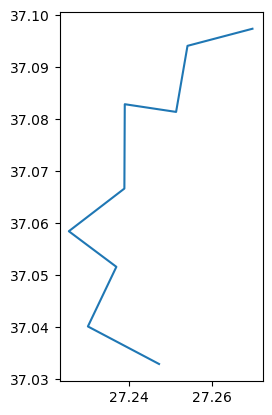

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_geojson(file_path):
    gdf = gpd.read_file(file_path)
    gdf.plot()
    plt.show()

if __name__ == "__main__":
    output_file = r'C:\Users\ASUS\Desktop\Douglas\out.geojson'
    plot_geojson(output_file)
